<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_10b_Superdense_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

In [2]:
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.visualization import plot_histogram
from qiskit.visualization.state_visualization import array_to_latex

In [3]:
def get_state(circuit):
  state_vector_simulator = Aer.get_backend("statevector_simulator")
  job = execute(circuit, backend=state_vector_simulator)
  result = job.result()
  return result.get_statevector()

In [4]:
def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

In [5]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        qc.i(qubit)
    if msg == "01":
        qc.x(qubit)
    if msg == "10":
        qc.z(qubit)
    if msg == "11":
        qc.y(qubit)
    return qc

In [6]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

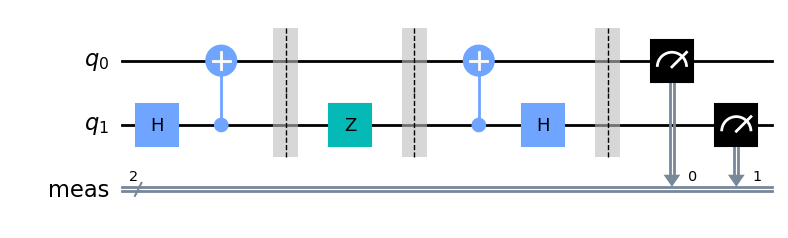

In [7]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw(output="mpl")

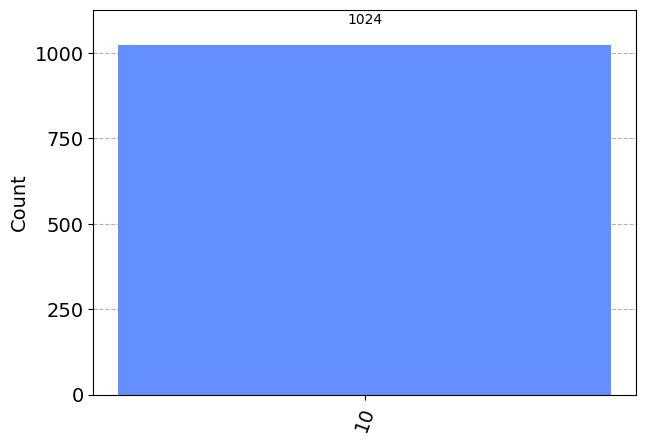

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)